## Data Description
In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_full = pd.read_csv(r"C:\Users\mansoorali_baig\Documents\DSA2019\myPython\data\porto-seguro-safe-driver-prediction\train.csv")

In [3]:
data_full.shape

(595212, 59)

In [5]:
data_full.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

Check class imbalance

In [6]:
from collections import Counter
Counter(data_full.target)

Counter({0: 573518, 1: 21694})

In [7]:
data = data_full.sample(frac=0.25)

In [9]:
data['target'].value_counts(normalize=True)

0    0.964147
1    0.035853
Name: target, dtype: float64

In [10]:
data['target'].value_counts(normalize=True)

0    0.964147
1    0.035853
Name: target, dtype: float64

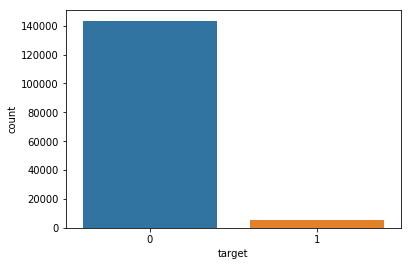

In [12]:
import seaborn as sns

sns.countplot('target', data=data)

Columns with -1 is blank columns

## Order of Solution

Drop columns (if var is high or low) <br>
Identify Missing Values and drop > 50% missing (if needed)<br>
Identify column types - integer of categorical <br>
Train vs. Test Split <br>
Impute Missing Values (if needed) should be imputed with Train for Test also<br>
Label or One-Hot Encoding (for Categorical variables) <br>
MinMax or Standard Scaing (for Integer variables <br>
Build Model <br>
Evaluate

In [13]:
list_nan = []
pct_nan = []

for col in data.columns:
    cnt = len(data[data[col] == -1])
    list_nan.append(cnt)
    pct_nan.append(cnt * 100 /len(data))

In [1]:
#Get missing value counts and percentage

missing_df = pd.DataFrame({'Column': data.columns,
                           'Count': list_nan,
                           'Missing%': pct_nan }) \
                    .sort_values(by = 'Missing%', ascending=False)

missing_df

cols_50pct_blank = [missing_df['Column'][i] for i in np.arange(len(missing_df))
                     if missing_df['Missing%'][i] > 50 ]
cols_50pct_blank

NameError: name 'pd' is not defined

In [15]:
redudant_cols = [col for col in data.columns
                     if len(data[col].unique()) in (1, len(data))]
redudant_cols

['id']

In [16]:
col_2_drop = ['ps_car_03_cat', 'id']
col_2_drop

['ps_car_03_cat', 'id']

In [17]:
data.drop(columns=col_2_drop, inplace=True)

In [18]:
data.shape

(148803, 57)

In [19]:
data.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

In [20]:
obj_cols = []
num_cols = []

for col in data.columns:
    if '_cat' in col or '_bin' in col:
        obj_cols.append(col)
    else:
        num_cols.append(col)

In [21]:
print(len(num_cols), len(obj_cols))

27 30


Train vs. Test split

In [22]:
y = data['target']
X = data.drop(columns='target')
X.shape

(148803, 56)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [24]:
y_train.value_counts(normalize=True)

0    0.964114
1    0.035886
Name: target, dtype: float64

In [25]:
X_test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
341342,5,1,8,1,0,1,0,0,0,0,...,6,0,2,6,0,0,1,0,1,0
196582,1,3,4,1,4,1,0,0,0,0,...,5,0,0,9,0,1,1,1,0,1
297795,0,1,1,0,0,0,1,0,0,0,...,6,1,1,14,0,1,1,1,0,0
503528,1,1,1,1,0,0,1,0,0,0,...,2,0,3,1,0,1,0,0,0,0
263390,3,1,4,1,0,0,1,0,0,0,...,4,2,1,9,0,1,1,0,1,0


In [26]:
X_train_bkup = X_train.copy()
X_test_bkup = X_test.copy()

Fill missing values with mean or mode accordingly

In [46]:
X_train = X_train_bkup.copy()
X_test = X_test_bkup.copy()

In [47]:
num_cols.remove('target')

ValueError: list.remove(x): x not in list

In [48]:
X_train.replace(to_replace=-1, value=np.nan, inplace=True)
X_test.replace(to_replace=-1, value=np.nan, inplace=True)

In [49]:
for col in X_train.columns:
    if col in num_cols:
        X_train[col].fillna(X_train[col].mean(), inplace=True, downcast=False)
        X_test[col].fillna(X_train[col].mean(), inplace=True, downcast=False)
    else:
        X_train[col].fillna(X_train[col].mode()[0], inplace=True, downcast=False)
        X_test[col].fillna(X_train[col].mode()[0], inplace=True, downcast=False)

In [50]:
X_test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
341342,5,1.0,8,1.0,0.0,1,0,0,0,0,...,6,0,2,6,0,0,1,0,1,0
196582,1,3.0,4,1.0,4.0,1,0,0,0,0,...,5,0,0,9,0,1,1,1,0,1
297795,0,1.0,1,0.0,0.0,0,1,0,0,0,...,6,1,1,14,0,1,1,1,0,0
503528,1,1.0,1,1.0,0.0,0,1,0,0,0,...,2,0,3,1,0,1,0,0,0,0
263390,3,1.0,4,1.0,0.0,0,1,0,0,0,...,4,2,1,9,0,1,1,0,1,0


Transform columns

In [43]:
for col in obj_cols:
    X_train[col] = X_train[col].astype('object')
    X_test[col] = X_test[col].astype('object')
    
for col in num_cols:
    X_train[col] = X_train[col].astype('float64')
    X_test[col] = X_train[col].astype('float64')

In [51]:
X_test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
341342,5,1.0,8,1.0,0.0,1,0,0,0,0,...,6,0,2,6,0,0,1,0,1,0
196582,1,3.0,4,1.0,4.0,1,0,0,0,0,...,5,0,0,9,0,1,1,1,0,1
297795,0,1.0,1,0.0,0.0,0,1,0,0,0,...,6,1,1,14,0,1,1,1,0,0
503528,1,1.0,1,1.0,0.0,0,1,0,0,0,...,2,0,3,1,0,1,0,0,0,0
263390,3,1.0,4,1.0,0.0,0,1,0,0,0,...,4,2,1,9,0,1,1,0,1,0


Label encoding

In [52]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

Apply Label encoding for categorical values

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoderExt()

for col in obj_cols:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col].astype('str'))
    X_test[col]  = le.transform(X_test[col].astype('str'))

Min Max Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in num_cols:
    X_train[col] = scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col] = scaler.transform(np.array(X_test[col]).reshape(-1, 1))

In [55]:
X_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3635,0.428571,1,0.181818,1,0,0,1,0,0,0,...,0.166667,0.111111,0.307692,0.380952,0,1,1,0,0,0
376200,0.285714,0,0.090909,0,0,1,0,0,0,0,...,0.166667,0.222222,0.076923,0.333333,0,0,0,0,0,0
256043,0.857143,3,0.636364,1,0,0,0,1,0,0,...,0.500000,0.222222,0.230769,0.285714,0,0,1,0,0,0
409386,0.000000,0,1.000000,0,0,0,0,0,1,0,...,0.611111,0.111111,0.384615,0.238095,0,0,0,1,0,0
559683,0.142857,1,0.090909,0,0,1,0,0,0,0,...,0.444444,0.222222,0.076923,0.428571,1,1,1,1,1,0


##  Model Building

Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\mansoorali_baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
X_test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
341342,0.714286,0,0.727273,1,0,1,0,0,0,0,...,0.333333,0.000000,0.153846,0.285714,0,0,1,0,1,0
196582,0.142857,2,0.363636,1,4,1,0,0,0,0,...,0.277778,0.000000,0.000000,0.428571,0,1,1,1,0,1
297795,0.000000,0,0.090909,0,0,0,1,0,0,0,...,0.333333,0.111111,0.076923,0.666667,0,1,1,1,0,0
503528,0.142857,0,0.090909,1,0,0,1,0,0,0,...,0.111111,0.000000,0.230769,0.047619,0,1,0,0,0,0
263390,0.428571,0,0.363636,1,0,0,1,0,0,0,...,0.222222,0.222222,0.076923,0.428571,0,1,1,0,1,0


In [62]:
logreg_pred = logreg.predict(X_test)

In [59]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28698
           1       0.00      0.00      0.00      1063

    accuracy                           0.96     29761
   macro avg       0.48      0.50      0.49     29761
weighted avg       0.93      0.96      0.95     29761



C:\Users\mansoorali_baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansoorali_baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansoorali_baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [63]:
confusion_matrix(y_test, logreg_pred)

array([[28698,     0],
       [ 1063,     0]], dtype=int64)

In [64]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=40, sampling_strategy=0.50)
X_res, y_res = sm.fit_sample(X_train, y_train)

print('Before: %s' %format(Counter(y_train)))
print('After: %s' %format(Counter(y_res)))

Using TensorFlow backend.


Before: Counter({0: 114770, 1: 4272})
After: Counter({0: 114767, 1: 57382})


In [65]:
57382/114767

0.4999869300408654

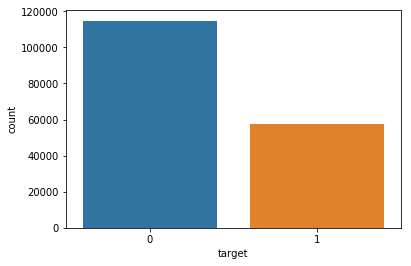

In [66]:
sns.countplot(y_res)

In [67]:
logreg_smote = LogisticRegression()
logreg_smote.fit(X_res, y_res)

logreg_smote_pred = logreg_smote.predict(X_test)

C:\Users\mansoorali_baig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
confusion_matrix(y_test, logreg_smote_pred)

array([[27063,  1635],
       [  989,    74]], dtype=int64)

In [70]:
print(classification_report(y_test, logreg_smote_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     28698
           1       0.04      0.07      0.05      1063

    accuracy                           0.91     29761
   macro avg       0.50      0.51      0.50     29761
weighted avg       0.93      0.91      0.92     29761

